In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

<h2> Loading and concating data </h2>

In [2]:
data = []
for i in range(1,6):
    tmp_df = pd.read_csv(f'data/data{i}.csv')
    tmp_df.columns =['Artist', 'Name', 'Year', 'Popularity', 'genre', 'lyrics'] 
    data.append(tmp_df)
df = pd.concat(data,ignore_index=True, sort=True)

In [3]:
# replace \r\n with space in Lyrics
df.lyrics = df.lyrics.str.replace('\r\n', ' ')

In [4]:
# extract gener
df.genre = df.genre.apply(lambda x: x[7:x.find('").setTar')])

In [5]:
df.genre.unique()

array(['Rock', 'Pop', 'Other', 'Country', 'RB', '', 'HipHop', 'Jazz',
       'Folk', 'Electronic', 'Indie'], dtype=object)

In [6]:
# sepaarate mising genre
df_mis_gen = df[df.genre ==""]
df = df[df.genre !=""]

In [7]:
#fixing Bob Marley's genre
bob = df_mis_gen[df_mis_gen.Artist == 'Bob Marley']
bob.genre = 'Folk'
df = pd.concat([df,bob],ignore_index=True, sort=True)

In [8]:
#fixing Zack Knight's genre
zak = df_mis_gen[df_mis_gen.Artist == 'Zack Knight']
zak.genre = 'RB'
df = pd.concat([df,zak],ignore_index=True, sort=True)

In [9]:
# saving missing genre
df_mis_gen.to_csv("missing_genre.csv")

In [10]:
# saving rows that contain missing values
df[df.isnull().values.any(axis=1)].to_csv('mising_val.csv')

In [11]:
#dropp mising value containing rows
df = df[~df.isnull().values.any(axis=1)]

In [12]:
# save dublicated rows
df[df[['Artist', 'Name' ]].duplicated()].sort_values(['Artist', 'Name' ]).to_csv('dublicated.csv')

In [13]:
#drop duplicates
df = df[~df[['Artist', 'Name' ]].duplicated()]

<h2> four informative visualizations </h2>

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from matplotlib.pyplot import figure
%matplotlib Inline

<h2> The avarage popularity af every gener </h2>

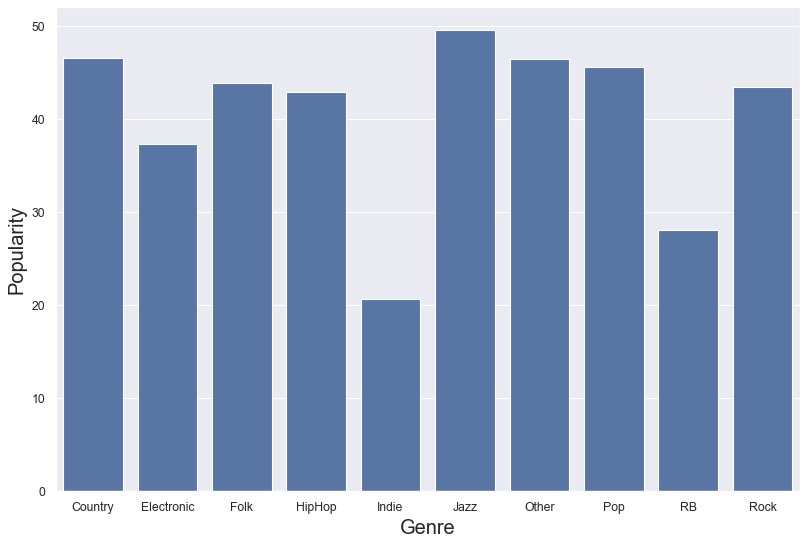

In [15]:
tmp = df[['genre','Popularity']].groupby('genre').mean()
fig = figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x=tmp.index, y=tmp.Popularity, color='b');
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Popularity', fontsize=18);

<h3> The chart show that Indie, R&B and Electronic are the most unpopular genres oppositely Jazz which of course the most popular for all times </h3>

In [16]:
from ipywidgets import interact, widgets

<h2> Time serries that shows yearly made songs in every genre and genre popularity </h2>

In [17]:
grouped_mean = df[['Year','genre','Popularity']].groupby(['Year','genre']).mean()
grouped_count = df[['Year','genre','Popularity']].groupby(['Year','genre']).count()
def plotyear(year): 
    fig = figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');
    x = grouped_count.loc[year].Popularity
    y = grouped_mean.loc[year].Popularity
    ax = sns.scatterplot(x=x, y=y, s=250)
    plt.xlabel('Number of songs in that genre', fontsize=20)
    plt.ylabel('Avarage popularity of genre', fontsize=20)
    ax.set_ylim([0,100])
    for i in list(list(x.index)):
        ax.text(x[i],y[i],i, fontsize=35, verticalalignment='bottom')

In [18]:
interact(plotyear, year=widgets.IntSlider(min=1990, max=2018, step=1, value=2015));

interactive(children=(IntSlider(value=2015, description='year', max=2018, min=1990), Output()), _dom_classes=(…

<h2> The  time series shows that after 2000 the amount of Rock and Pop songs significantly larger than other genres, also Jazz songs tipically  announced in fewer countities but they typically are on top of popularity, another thing is that at 2015 year genre Indie is outsider becouse of low popularity and so on </h2>

In [19]:
from scipy import stats

<h2> The mean popularity of each artist</h2>

In [20]:
grouped = df[['Artist','Popularity', 'Year']].groupby(['Artist','Year']).apply(func=stats.hmean)

In [21]:
def plot_artist(artist):
    fig = figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');
    data = grouped[artist]
    ax = sns.scatterplot(x=data.index, y=data.values, s=300)
    plt.xlabel('Year', fontsize=20)
    plt.ylabel('Avarage popularity of Artist', fontsize=20);
    plt.title(artist, fontsize=30)
    ax.tick_params(axis='x', labelsize=15 )
    ax.tick_params(axis='y', labelsize=15 )
    ax.set_ylim([0,100])

In [22]:
interact(plot_artist, artist=widgets.Dropdown(options=df.Artist.unique(), value='Adele',  description='Artist:'));

interactive(children=(Dropdown(description='Artist:', index=3, options=('Atif Aslam', 'ABBA', 'Arijit Singh', …

<h2> The following heatmap shows how the number of songs announced every year dramaticaly increase compering a few Folk and Rock songs in 70s to 2000s. It also shows development of each genre, for exaple accordig our data Country genre achives to it popularity in mining of new songs around 2005, RB starts to become popular since 1995  </h2> 

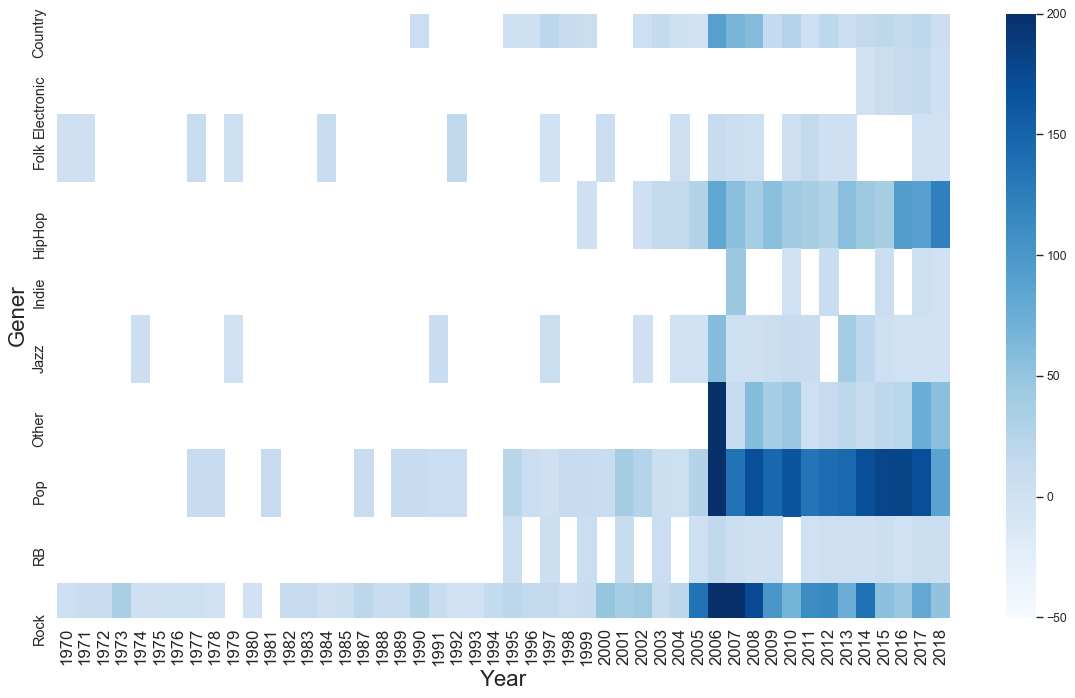

In [23]:
sns.set_style("whitegrid")
fig = figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');
df2 = grouped_count.reset_index().pivot(columns='Year',index='genre',values='Popularity')
ax = sns.heatmap(df2,cmap="Blues", vmin=-50, vmax=200);
ax.tick_params(axis='x', labelsize=15 );
ax.tick_params(axis='y', labelsize=13 );
plt.xlabel('Year', fontsize=20)
plt.ylabel('Gener', fontsize=20);

In [24]:
# saving songs with very short lyrics, instrumental you can feel it and such kind of staff
df[df.lyrics.str.len() <= 60].to_csv('uncertain_lirics.csv')

In [25]:
# remov songs with very short lyrics
df = df[df.lyrics.str.len() > 60]

In [26]:
#ABBA	Hamlet III Lyrics story beside of lirics
ind = df[df.Artist == 'ABBA'][df.Name =='Hamlet III Lyrics'].index
df.drop(ind, inplace=True)

<h2> Nonlatin chaaracters </h2>

In [27]:
# Arijit Singh	Tera Yaar Hoon Main Lyrics

tmp = df[df.Artist == 'Arijit Singh'][df.Name =='Tera Yaar Hoon Main Lyrics']
tmp.lyrics.item()

"तू जो रूठा तो कौन हंसेगा तू जो छूटा तो कौन रहेगा तू चुप है तो ये डर लगता है अपना मुझको अब कौन कहेगा तू ही वजह. तेरे बिना बेवजह बेकार हूँ मैं तेरा यार हूँ मैं तेरा यार हूँ मैं,आजा लड़ें फिर खिलौनों के लिए तू जीते मैं हार जाऊं आजा करें फिर वोही शरारतें तू भागे मैं मार खाऊं,मीठी सी वो गाली तेरी सुनने को तैयार हूँ मैं तेरा यार हूँ मैं हम्म. तेरा यार हूँ मैं तेरा यार हूँ.,सजना दे रंग रंगइयां वे सगना दियां सह्नायाँ वे ढोल वजांगे यार नचांगे लख लख दो बधाईयाँ वे,खुशियाँ च नचदा मैं फिरां हंजुँ तों बचदा मैं फिरां.,ओ जाते नहीं कहीं रिश्ते पुराने किसी नए के आ जाने से जाता हूँ मैं तो मुझे तू जाने दे क्यूँ परेशां है मेरे जाने से,टूटा है तो जुड़ा है क्यूँ मेरी तरफ तू मुड़ा है क्यूँ हक नहीं तू ये कहे की यार अब हम ना रहे,एक तेरी यारी का ही सातों जनम हक़दार हूँ मैं,तेरा यार हूँ मैं तेरा यार हूँ मैं तेरा यार हूँ मैं तेरा यार हूँ मैं.,Tu jo rootha toh kaun hansega Tu jo chhoota toh kaun rahega Tu chup hai toh yeh darr lagta hai Apna mujhko ko ab kaun kahega,Tu hi wajah... Tere bina bewajah bekar hoon main Ter

In [28]:
string = "तू जो रूठा तो कौन हंसेगा तू जो छूटा तो कौन रहेगा तू चुप है तो ये डर लगता है अपना मुझको अब कौन कहेगा तू ही वजह. तेरे बिना बेवजह बेकार हूँ मैं तेरा यार हूँ मैं तेरा यार हूँ मैं,आजा लड़ें फिर खिलौनों के लिए तू जीते मैं हार जाऊं आजा करें फिर वोही शरारतें तू भागे मैं मार खाऊं,मीठी सी वो गाली तेरी सुनने को तैयार हूँ मैं तेरा यार हूँ मैं हम्म. तेरा यार हूँ मैं तेरा यार हूँ.,सजना दे रंग रंगइयां वे सगना दियां सह्नायाँ वे ढोल वजांगे यार नचांगे लख लख दो बधाईयाँ वे,खुशियाँ च नचदा मैं फिरां हंजुँ तों बचदा मैं फिरां.,ओ जाते नहीं कहीं रिश्ते पुराने किसी नए के आ जाने से जाता हूँ मैं तो मुझे तू जाने दे क्यूँ परेशां है मेरे जाने से,टूटा है तो जुड़ा है क्यूँ मेरी तरफ तू मुड़ा है क्यूँ हक नहीं तू ये कहे की यार अब हम ना रहे,एक तेरी यारी का ही सातों जनम हक़दार हूँ मैं,तेरा यार हूँ मैं तेरा यार हूँ मैं तेरा यार हूँ मैं तेरा यार हूँ मैं.,Tu jo rootha toh kaun hansega Tu jo chhoota toh kaun rahega Tu chup hai toh yeh darr lagta hai Apna mujhko ko ab kaun kahega,Tu hi wajah... Tere bina bewajah bekar hoon main Tera yaar hoon main Tera yaar hoon main,Aaja ladein phir khilono ke liye Tu jeete main haar jaaun Aaja karein phir wohi shararatein Tu bhaage main maar khaaun,Meethi si woh gaali teri Sun'ne ko taiyaar hoon main Tera yaar hoon main Tera yaar hoon main Tera yaar hoon...,Sajna de rang rangaaiyan ve Sagna diyan sehnaiyan ve Dhol wajange yaar nachange Lakh lakh deo badhaiyan ve,Khusiyan 'ch nachda main phiraan Hanjuan ton bachda main phiraan...,O jaate nahi kahin rishte puraane Kisi naye ke aa jaane se Jaata hoon main toh mujhe tu jaane de Kyun pareshan hai mere jaane se...,Toota hai toh juda hai kyun Meri taraf tu muda hai kyun Haq nahi tu yeh kahe ki yaar ab hum na rahe,Ek teri yaari ka hi Saaton janam haqdaar hoon main Tera yaar hoon main...,Tera yaar hoon main... Tera yaar hoon main...,Tera yaar hoon main..."

In [29]:
import re

In [30]:
df[~df.lyrics.str.match(r'\W+')].lyrics.to_csv('test.csv')

<h2> sentiment and polarity of each song </h2>

In [105]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize,RegexpTokenizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [95]:
new_df1 = pd.read_csv('new_data/Train.csv')
new_df2 = pd.read_csv('new_data/Test.csv')
new_df = pd.concat([new_df1,new_df2],ignore_index=True, sort=True)
stemmer = SnowballStemmer("english")
tokenizer = RegexpTokenizer("[\w’]+", flags=re.UNICODE)
new_df

,Artist,Mood,Name,lyrics
0,Sum 41,angry,All Messed Up,Another day wasted out of time I can't get out...
1,Metallica,angry,All Nightmare Long,Crawl from the wreckage one more time Horrific...
2,Green Day,angry,American Idiot (Album Version),Don't wanna be an American idiot. Don't want ...
3,Megadeth,angry,Angry Again,The more of you that I inspect The more of me ...
4,Roadrunner United,angry,Annihilation By The Hands Of God (Album Version),The prophets of God have left you solaced inde...
...,...,...,...,...
773,chris young,relaxed,You,The bluest skies don't seem so blue And the st...
774,Carly Simon,relaxed,You Are My Sunshine,"You are my sunshine, my only sunshine You make..."
775,Carla Bruni,relaxed,You Belong To Me,See the pyramids along the Nile Watch the sunr...
776,Jason Wade,relaxed,You Belong To Me,See the pyramids along the Nile Watch the sun ...


In [96]:
def tokenize(s):
    s = s.lower() 
    tokens = tokenizer.tokenize(s)
    tokens = [stemmer.stem(t) for t in tokens]
    return tokens

In [97]:
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(new_df.lyrics)
X.shape

(778, 6561)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, new_df.Mood, test_size=0.15, random_state=42)

In [108]:
params = {'C' : np.arange(0.5,5,0.5),
          'gamma' : np.arange(0.5,5,0.5),
          'kernel':['linear','rbf']}
svc = SVC()
clf = GridSearchCV(estimator=svc, param_grid=params, n_jobs=-1)

In [109]:
clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
                         'gamma': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [113]:
clf.score(X_test, y_test)

0.4188034188034188

0.42735042735042733

In [82]:
model.score( X_test, y_test )

0.4188034188034188

In [ ]:
X.shape

In [78]:
X_train.shape

(661, 6561)

In [ ]:
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+', flags=re.UNICODE)
tokenizer.tokenize(corpus)

In [ ]:
(400, 5968)

In [ ]:
vectorizer1 = TfidfVectorizer(tokenizer=tokenize, stop_words = stopwords.words('english'))
vectorizer2 = TfidfVectorizer(stop_words = stopwords.words('english'))

In [ ]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

In [ ]:
X = vectorizer1.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X.shape)

In [ ]:
X = vectorizer2.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X.shape)